In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/train',
target_size = (256,256),
batch_size = 32,
classes = ['class0', 'class1'])

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/test',
target_size = (256,256),
batch_size = 1,
class_mode = None)

valid_set = train_datagen.flow_from_directory('/content/drive/My Drive/valid',
target_size = (256,256),
batch_size = 32,
classes = ['class0', 'class1'])

Found 455 images belonging to 2 classes.
Found 98 images belonging to 1 classes.
Found 64 images belonging to 2 classes.


In [21]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 2, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [4]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 128)               1

In [22]:
STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=valid_set.n//valid_set.batch_size
model_info = classifier.fit_generator(generator=training_set,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_set,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=30
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/30
14/14 [==============================] - 11s 773ms/step - loss: 2.1512 - accuracy: 0.5272 - val_loss: 0.6694 - val_accuracy: 0.6094
Epoch 2/30
14/14 [==============================] - 10s 729ms/step - loss: 0.5888 - accuracy: 0.6738 - val_loss: 0.6756 - val_accuracy: 0.6094
Epoch 3/30
14/14 [==============================] - 10s 724ms/step - loss: 0.5069 - accuracy: 0.7470 - val_loss: 0.6094 - val_accuracy: 0.6250
Epoch 4/30
14/14 [==============================] - 10s 714ms/step - loss: 0.4909 - accuracy: 0.7660 - val_loss: 0.5906 - val_accuracy: 0.6875
Epoch 5/30
14/14 [==============================] - 10s 722ms/step - loss: 0.4509 - accuracy: 0.7943 - val_loss: 0.5461 - val_accuracy: 0.7500
Epoch 6/30
14/14 [==============================] - 10s 758ms/step - loss: 0.4596 - accuracy: 0.7849 - val_loss: 0.4509 - val_accuracy: 0.8125
Epoch 7/30
14/14 [==============================] - 10s 718ms/step - loss: 0.4556 - accuracy: 0.7872 - val_loss: 0.5283 - val_accuracy: 0.7188

In [23]:
score = classifier.evaluate_generator(generator=valid_set,steps=STEP_SIZE_VALID)
print(" Total: ", len(valid_set.filenames))
print("Loss: ", score[0], "Accuracy: ", score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


 Total:  64
Loss:  0.2924516201019287 Accuracy:  0.890625


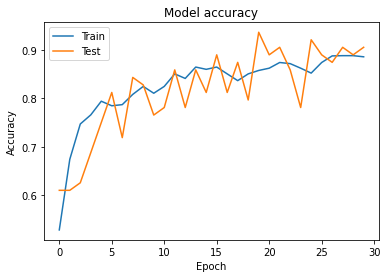

In [24]:
import matplotlib.pyplot as plt
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [25]:
import numpy as np
import pandas as pd

In [11]:
train_path = "/content/drive/My Drive/train"
test_path = "/content/drive/My Drive/test"
valid_path = "/content/drive/My Drive/valid"

In [12]:
train_batches = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True).flow_from_directory(train_path, target_size=(224,224), classes = ['class0', 'class1'], batch_size=32)
test_batches = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True).flow_from_directory(test_path, target_size=(224,224), class_mode= None, batch_size=32)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes = ['class0', 'class1'], batch_size=32)

Found 455 images belonging to 2 classes.
Found 98 images belonging to 1 classes.
Found 64 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
vgg16_model = tf.keras.applications.vgg16.VGG16()

553476096/553467096 [==============================] - 2s 0us/step


In [ ]:
new_model = Sequential()
for layer in vgg16_model.layers[:-1]:
    new_model.add(layer)

In [ ]:
new_model.add(Dense(2, activation='softmax'))

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
opt = tf.keras.optimizers.Adam(lr=0.0001)
new_model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
STEP_SIZE_OF_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_OF_VALID=valid_batches.n//valid_batches.batch_size
history = new_model.fit_generator(generator=train_batches,
                    steps_per_epoch=STEP_SIZE_OF_TRAIN,
                    validation_data=valid_batches,
                    validation_steps=STEP_SIZE_OF_VALID,
                    epochs=30
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/30
14/14 [==============================] - 62s 3s/step - loss: 1.7386 - accuracy: 0.5106 - val_loss: 0.5931 - val_accuracy: 0.7500
Epoch 2/30
14/14 [==============================] - 10s 715ms/step - loss: 0.6546 - accuracy: 0.6525 - val_loss: 0.5276 - val_accuracy: 0.6875
Epoch 3/30
14/14 [==============================] - 10s 712ms/step - loss: 0.6497 - accuracy: 0.6785 - val_loss: 0.4217 - val_accuracy: 0.7969
Epoch 4/30
14/14 [==============================] - 10s 711ms/step - loss: 0.6206 - accuracy: 0.7139 - val_loss: 0.7388 - val_accuracy: 0.5000
Epoch 5/30
14/14 [==============================] - 10s 716ms/step - loss: 0.5972 - accuracy: 0.7139 - val_loss: 0.4319 - val_accuracy: 0.7344
Epoch 6/30
14/14 [==============================] - 10s 712ms/step - loss: 0.6535 - accuracy: 0.7187 - val_loss: 0.5175 - val_accuracy: 0.7188
Epoch 7/30
14/14 [==============================] - 10s 772ms/step - loss: 0.4648 - accuracy: 0.7967 - val_loss: 0.3308 - val_accuracy: 0.8438
Ep

In [ ]:
score = new_model.evaluate_generator(generator=valid_batches,steps=STEP_SIZE_OF_VALID)
print(" Total: ", len(valid_batches.filenames))
print("Loss: ", score[0], "Accuracy: ", score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


 Total:  64
Loss:  0.14596675336360931 Accuracy:  0.953125


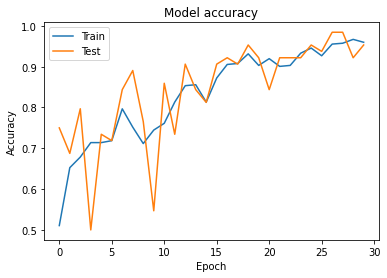

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()